In [2]:
import os

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import set_config
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

from src.config import LABEL_COLUMN
from src.utils import plot_metric_curves
from src.transformer import preprocessor

set_config(display="diagram")

# Load Dataset

In [3]:
train = pd.read_csv('../data/users_train.csv')
test = pd.read_csv('../data/users_test.csv')

x_train, y_train = train.drop(columns=[LABEL_COLUMN]), train[LABEL_COLUMN]
x_test, y_test = test.drop(columns=[LABEL_COLUMN]), test[LABEL_COLUMN]

# Modeling - Boosting

## Only numeric features
### Model

In [4]:
gb_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor(categical=False)),
        ("gb_model", GradientBoostingClassifier()),
    ]
)
gb_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numeric_features',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['cnt_user_engagement',
                                                   'cnt_level_start_quickplay',
                                                   'cnt_level_end_quickplay',
                                                   'cnt_level_complete_quickplay',
                                                   'cnt_level_reset_quickplay',
                                                   'cnt_post_score',
                                                   'cnt_spend_virtual_currency',
                                                   'cnt_ad_reward',
                                                   'cnt_challenge_a_friend',
                                                   'cnt_completed_5_levels',
                                                   'cnt_use_extra_steps']),
                                                 ('categorical_features',
                                                  'drop',
                                                  ['country_name', 'device_os',
                                                   'device_lang']),
                                                 ('ignore_features', 'drop',
                                                  ['user_first_engagement',
                                                   'user_pseudo_id',
                                                   'is_enable', 'bounced'])])),
                ('gb_model', GradientBoostingClassifier())])

### Evaluation

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       614
           1       0.61      0.06      0.11       185

    accuracy                           0.77       799
   macro avg       0.69      0.52      0.49       799
weighted avg       0.74      0.77      0.69       799



None

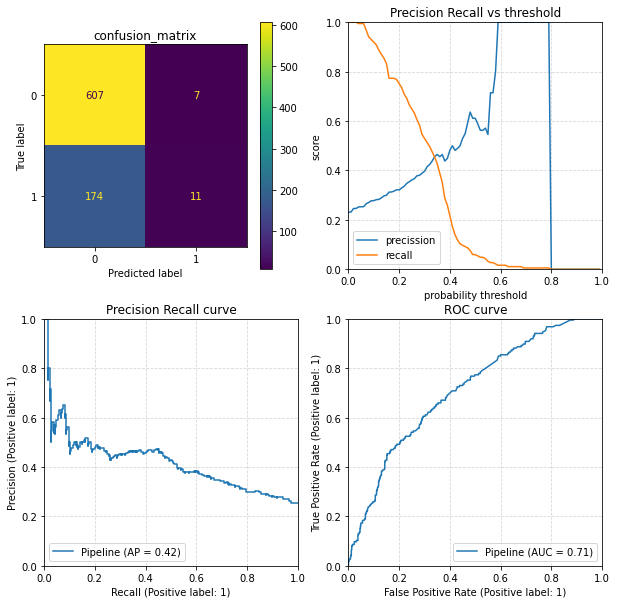

In [5]:
x = x_test
y = y_test

y_pred = gb_model.predict(x)
display(print(metrics.classification_report(y, y_pred)))
ax = plot_metric_curves(gb_model, x, y)

## Numerical and Categorical features
### Transformer

### Modeling

In [7]:
gb_model_full = Pipeline(
    steps=[
        ("preprocessor", preprocessor()),
        ("gb_model", GradientBoostingClassifier()),
    ]
)
gb_model_full.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numeric_features',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['cnt_user_engagement',
                                                   'cnt_level_start_quickplay',
                                                   'cnt_level_end_quickplay',
                                                   'cnt_level_complete_quickplay',
                                                   'cnt_level_reset_quickplay',
                                                   'cnt_post_scor...
                                                   'cnt_use_extra_steps']),
                                                 ('categorical_features',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['country_name', 'device_os',
                                                   'device_lang']),
                                                 ('ignore_features', 'drop',
                                                  ['user_first_engagement',
                                                   'user_pseudo_id',
                                                   'is_enable', 'bounced'])])),
                ('gb_model', GradientBoostingClassifier())])

### Evaluation

              precision    recall  f1-score   support

           0       0.77      0.98      0.87       614
           1       0.47      0.05      0.09       185

    accuracy                           0.77       799
   macro avg       0.62      0.52      0.48       799
weighted avg       0.70      0.77      0.69       799



None

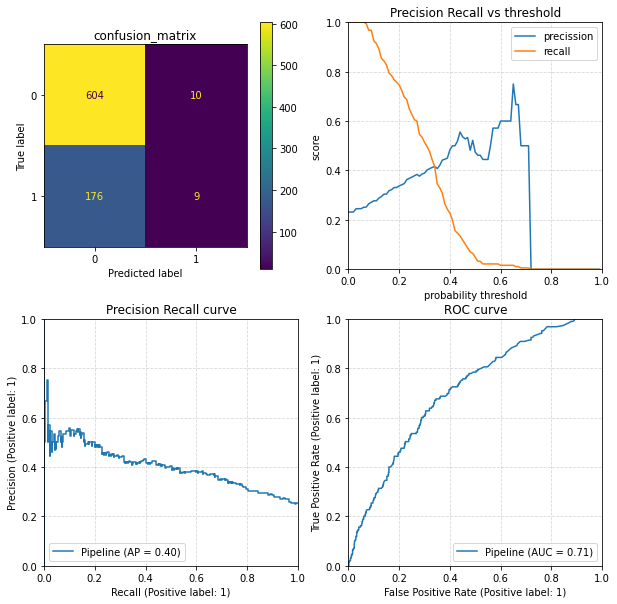

In [8]:
x = x_test
y = y_test

y_pred = gb_model_full.predict(x)
display(print(metrics.classification_report(y, y_pred)))
ax = plot_metric_curves(gb_model_full, x, y)

## Save model 

In [9]:
model_path = 'models'
if not os.path.exists(model_path):
    os.makedirs(model_path)

joblib.dump(gb_model_full, f'{model_path}/gb_model_full.job')

['models/gb_model_full.job']